## Market Basket Analysis

The dataset contains randomized sales data from a retail company, providing a rich source for understanding purchasing patterns and customer behavior.

**Tasks:**

1. **Data Preprocessing:** 

    - **Data Cleaning:** Ensuring the dataset is accurate and reliable by handling missing data, correcting errors, removing duplicates, and converting data types. This step is crucial to ensure the quality of the analysis.

    - **Data Transformation:** Preparing raw data for analysis by transforming or encoding it into a suitable format for modeling. This includes normalization, scaling, encoding categorical variables, and dealing with missing values to make the data more usable for machine learning algorithms.

2. **Feature Engineering:** Leveraging domain knowledge to create new features from raw data that can enhance the data analysis process. This step involves generating additional predictors that improve the performance of machine learning models and provide deeper insights into the data.

3. **Data Analysis:** 

    - **Market Basket Analysis:** Applying data mining techniques to identify patterns and associations between products frequently bought together by customers.

    - **FP-Growth Algorithm:** Utilizing the FP-Growth algorithm to efficiently find frequent item sets and generate association rules, which help highlight relationships between different items.
    
    - **Combinations and Counter:** Using combinations from itertools and Counter from collections to analyze the frequency of product pairs. This helps in understanding customer purchase behavior and optimizing product placements and promotions. Through these methods, we can derive combinations of products that are often bought together, providing actionable insights for the retail company to enhance their sales strategy and customer satisfaction.

**Import the dataset** 

In [467]:
import pandas as pd

df = pd.read_csv(r'C:\Users\user\Desktop\Studies\Portfolio\SQL Projects\Sales Analysis Project\Sales Product Data\Sales_April_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


**Merging 12 months of sales data into single file**

In [468]:
import glob
import os

# Define the path to the CSV files
path = r'C:\Users\user\Desktop\Studies\Portfolio\SQL Projects\Sales Analysis Project\Sales Product Data'

# Use glob to get all the CSV files in the directory
all_files = glob.glob(os.path.join(path, "*.csv"))

# Print the list of files to debug
#print("Files found:", all_files)

# Read each CSV file into a DataFrame and store them in a list
df_list = [pd.read_csv(f) for f in all_files]

# Concatenate all the DataFrames into a single DataFrame if the list is not empty
df_sales = pd.concat(df_list, ignore_index=True)
df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


**Data preprocessing**

In [469]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [470]:
# Get only the columns with NaN values
columns_with_nan = df_sales.columns[df_sales.isna().any()].tolist()

for col in columns_with_nan:
    nan_count = df_sales[col].isna().sum()
    print(f"{col} - {nan_count}")

Order ID - 545
Product - 545
Quantity Ordered - 545
Price Each - 545
Order Date - 545
Purchase Address - 545


In [471]:
df_sales = df_sales.dropna()

### Double Check
columns_with_nan = df_sales.columns[df_sales.isna().any()].tolist()

for col in columns_with_nan:
    nan_count = df_sales[col].isna().sum()
    print(f"{col} - {nan_count}")

The dataset does not have any NAN

In [472]:
df_sales.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


**Notice some issues:**

* Order Date column has "Order Date" typo instead of the date of the order

In [473]:
### Find 'Or' and delete it

df_sales = df_sales[df_sales['Order Date'].str[0:2] != 'Or']
df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [474]:
### Double Check
df_sales.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,185950,185950,185950,185950,185950,185950
unique,178437,19,9,23,142395,140787
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21903,168552,21903,8,9


**Changing columns to the right data types**

In [475]:
df_sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [476]:
df_sales['Quantity Ordered'] = df_sales['Quantity Ordered'].astype('int32')
df_sales['Price Each'] = df_sales['Price Each'].astype('float')
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'])

In [477]:
df_sales.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [478]:
unique_orders = df_sales['Order ID'].nunique()
total_orders = df_sales['Order ID'].count()

print(f'unique_orders: {unique_orders} \ntotal_orders: {total_orders}')
avg = round(total_orders/unique_orders,2)
print(f'Avg number of products per order {avg})')

unique_orders: 178437 
total_orders: 185950
Avg number of products per order 1.04)


In [479]:
df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


**Feature engineering**

In [480]:
df_sales['Month'] = df_sales['Order Date'].dt.strftime('%m') # Extracting month form 'Order Date' column
df_sales['Year'] = df_sales['Order Date'].dt.strftime('%Y') # Extracting year form 'Order Date' column
df_sales['Hour'] = df_sales['Order Date'].dt.strftime('%H') # Extracting year form 'Order Date' column
df_sales['Amount'] = df_sales['Quantity Ordered'] * df_sales['Price Each'] #Adding sale total price column
df_sales[['Street', 'City', 'State']] = df_sales['Purchase Address'].str.split(',', expand=True) # "expand=True" splits to multiple columns and "expand=False" to one

col_to_drop = ['Order Date', 'Purchase Address']
df_sales.drop(columns=col_to_drop, inplace=True)
df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Month,Year,Hour,Amount,Street,City,State
0,176558,USB-C Charging Cable,2,11.95,04,2019,08,23.90,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04,2019,22,99.99,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,04,2019,14,600.00,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,04,2019,14,11.99,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,04,2019,09,11.99,333 8th St,Los Angeles,CA 90001


In [481]:
df_sales['Year'].value_counts()

2019    185916
2020        34
Name: Year, dtype: int64

In [482]:
df_sales = df_sales[df_sales['Year'] != '2020']
df_sales['Year'].value_counts()

2019    185916
Name: Year, dtype: int64

For this analysis, I use just 2019 and for accuracy 2020 can be removed from the dataset.

**Data Analysis**

Best month of the year

In [483]:
### Group by Month column and sum all the numeric columns

df_sales.groupby(['Month'])['Quantity Ordered','Amount'].sum().sort_values('Amount', ascending=False)

C:\Users\user\AppData\Local\Temp\ipykernel_20680\2922862248.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sales.groupby(['Month'])['Quantity Ordered','Amount'].sum().sort_values('Amount', ascending=False)


,Quantity Ordered,Amount
Month,,
12,28114,4613443.34
10,22703,3736726.88
04,20558,3390670.24
11,19798,3199603.20
05,18667,3152606.75
03,17005,2807100.38
07,16072,2647775.76
06,15253,2577802.26
08,13448,2244467.88


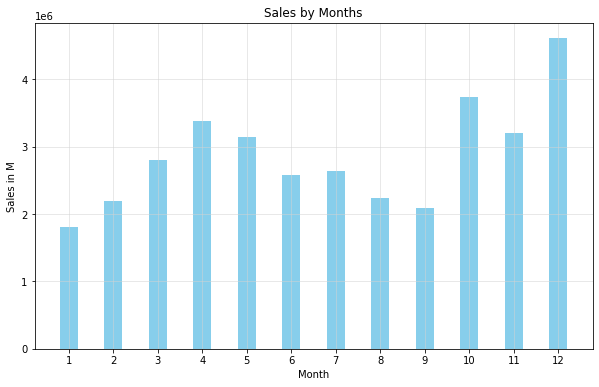

In [484]:
import matplotlib.pyplot as plt


results = df_sales.groupby(['Month']).sum()
all_months = range(1,13)

plt.figure(figsize=(10, 6))
plt.bar(all_months, results['Amount'], color='skyblue', width=0.4)
plt.xticks(all_months) # showing all the months
plt.title('Sales by Months')
plt.xlabel('Month')
plt.ylabel('Sales in M')
plt.grid(True, linestyle='-', linewidth=0.5, color='lightgray', zorder=1)
plt.show()

The city with the highest number of sales

In [485]:
### Group by City column and sum all the numeric columns
df_sales.groupby(['City']).sum().sort_values('Amount', ascending=False)

,Quantity Ordered,Price Each,Amount
City,,,
San Francisco,50226,8209086.85,8259719.03
Los Angeles,33288,5420435.24,5451570.81
New York City,27916,4634087.11,4662976.81
Boston,22524,3636082.88,3660315.12
Atlanta,16602,2779908.20,2795498.58
Dallas,16728,2750912.87,2766260.45
Seattle,16552,2733146.02,2747605.49
Portland,14051,2307594.48,2320337.62
Austin,11151,1809373.63,1819081.77


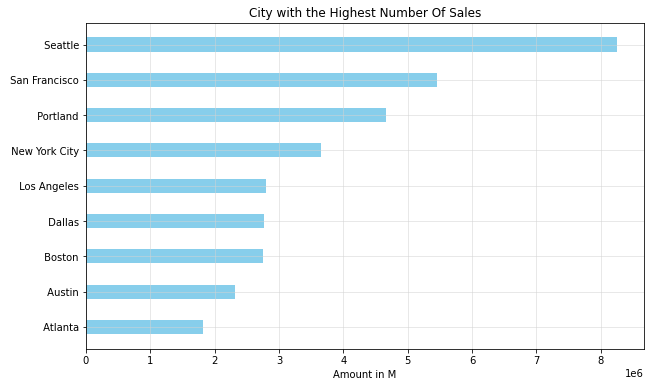

In [486]:
results = df_sales.groupby(['City']).sum().sort_values('Amount', ascending=True)
cities = [city for city, df_sales in df_sales.groupby('City')]
                                                    
plt.figure(figsize=(10, 6))
plt.barh(cities, results['Amount'], color = 'skyblue', height=0.4)
plt.title('City with the Highest Number Of Sales')
plt.xlabel('Amount in M')
plt.grid(True, linestyle='-', linewidth=0.5, color='lightgray', zorder=1)
plt.show()

**What time should we display advertisements to maximize feasibility of customer's buying the product?**

In [487]:
#### Group by Hour column and count Quantity Order column
df_vis = df_sales.groupby(['Hour']).count()['Quantity Ordered']

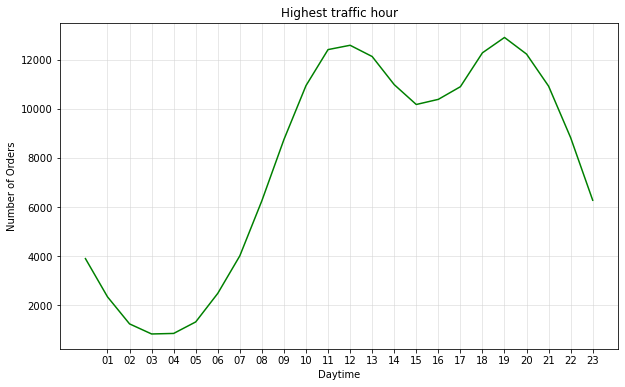

In [488]:
all_hours = range(1,24)  # setting the range 

plt.figure(figsize=(10, 6))
plt.plot(df_vis, color= 'green') 
plt.xticks(all_hours)  # implementing the range for showing
plt.title('Highest traffic hour')
plt.xlabel('Daytime')
plt.ylabel('Number of Orders')
plt.grid(True, linestyle='-', linewidth=0.5, color='lightgray', zorder=1)
plt.show()


My recommendation is to start advertising between 7am and 12am, and between 6pm and 8pm

**What products are most often sold together**

In [489]:
order_products = pd.get_dummies(df_sales['Product']).groupby(df_sales['Order ID']).max()
#order_products = order_products.reset_index(inplace=False)
order_products

,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Order ID,,,,,,,,,,,,,,,,,,,
141234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
141235,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
141236,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
141237,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
141238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319666,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
319667,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
319668,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [490]:
# Installing relevant packages and libraries.
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules

fpgrowth_order_products = fpgrowth(order_products, min_support=0.001, use_colnames=True)
fpgrowth_order_products

c:\Users\user\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.038328,(iPhone)
1,0.121067,(Lightning Charging Cable)
2,0.105635,(Wired Headphones)
3,0.042011,(27in FHD Monitor)
4,0.115411,(AAA Batteries (4-pack))
5,0.034887,(27in 4K Gaming Monitor)
6,0.122479,(USB-C Charging Cable)
7,0.074521,(Bose SoundSport Headphones)
8,0.086998,(Apple Airpods Headphones)
9,0.026457,(Macbook Pro Laptop)


In [491]:
association_rules = association_rules(fpgrowth_order_products, metric="confidence", min_threshold= 0.05)
association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(iPhone),(Apple Airpods Headphones),0.038328,0.086998,0.002085,0.054402,0.625322,-0.001249,0.965528,-0.383879
1,(iPhone),(Wired Headphones),0.038328,0.105635,0.002590,0.067564,0.639592,-0.001459,0.959169,-0.369465
2,(iPhone),(Lightning Charging Cable),0.038328,0.121067,0.005661,0.147704,1.220023,0.001021,1.031254,0.187531
3,(Vareebadd Phone),(USB-C Charging Cable),0.011569,0.122479,0.002063,0.178295,1.455715,0.000646,1.067926,0.316716
4,(Google Phone),(USB-C Charging Cable),0.030946,0.122479,0.005588,0.180583,1.474401,0.001798,1.070909,0.332034
5,(Google Phone),(Wired Headphones),0.030946,0.105635,0.002365,0.076435,0.723577,-0.000904,0.968383,-0.282754


In [492]:
# Calculate Kulczynski Coefficient
association_rules['kulczynski_coefficient'] = round(0.5 * (association_rules['confidence'] + 
                                                           association_rules['lift']), 3)
    
# Calculate Imbalance Ratio
association_rules['imbalance_ratio'] = round(
    association_rules.apply(lambda row: max(row['confidence'], row['lift']) / min(row['confidence'], row['lift']),
                             axis=1), 3)

# Display the DataFrame with new columns
association_rules = association_rules.drop(columns= ['conviction','zhangs_metric','leverage'])

association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,kulczynski_coefficient,imbalance_ratio
0,(iPhone),(Apple Airpods Headphones),0.038328,0.086998,0.002085,0.054402,0.625322,0.340,11.494
1,(iPhone),(Wired Headphones),0.038328,0.105635,0.002590,0.067564,0.639592,0.354,9.467
2,(iPhone),(Lightning Charging Cable),0.038328,0.121067,0.005661,0.147704,1.220023,0.684,8.260
3,(Vareebadd Phone),(USB-C Charging Cable),0.011569,0.122479,0.002063,0.178295,1.455715,0.817,8.165
4,(Google Phone),(USB-C Charging Cable),0.030946,0.122479,0.005588,0.180583,1.474401,0.827,8.165
5,(Google Phone),(Wired Headphones),0.030946,0.105635,0.002365,0.076435,0.723577,0.400,9.467


#### Notes:  
This table provide insights into the strength and significance of the association between antecedents and consequents in the dataset, helping in understanding patterns and making informed decisions in various areas.

-  If the "Antecedent" is present it implies that the "Consequent" is also likely to be present.
- "Support" indicates the frequency of occurrence of both antecedent and consequent together in the dataset.
- "Confidence" measures the likelihood of finding the "Consequent" in transactions containing the "Antecedent".
- "Lift" (correlation) indicates how much more likely the "Antecedent" and "Consequent" are to occur together compared to if they were independent of each other.
- Kulczynski Coefficient suggest relationship
- Imbalance ratio suggets imbalace relationship

In [493]:
association_rules = association_rules[['antecedents', 'consequents', 'support']].sort_values('support', ascending=True)
association_rules

,antecedents,consequents,support
3,(Vareebadd Phone),(USB-C Charging Cable),0.002063
0,(iPhone),(Apple Airpods Headphones),0.002085
5,(Google Phone),(Wired Headphones),0.002365
1,(iPhone),(Wired Headphones),0.002590
4,(Google Phone),(USB-C Charging Cable),0.005588
2,(iPhone),(Lightning Charging Cable),0.005661


In [494]:
asso_rules_grouped = association_rules
asso_rules_grouped['antecedents'] = asso_rules_grouped['antecedents'].apply(lambda x: ', '.join(list(x)))
asso_rules_grouped['consequents'] = asso_rules_grouped['consequents'].apply(lambda x: ', '.join(list(x)))
asso_rules_grouped['products'] = asso_rules_grouped['antecedents'] + ' -> ' + asso_rules_grouped['consequents']

asso_rules_grouped = asso_rules_grouped.drop(columns= ['antecedents', 'consequents'])
asso_rules_grouped = asso_rules_grouped[['products', 'support']]
asso_rules_grouped

,products,support
3,Vareebadd Phone -> USB-C Charging Cable,0.002063
0,iPhone -> Apple Airpods Headphones,0.002085
5,Google Phone -> Wired Headphones,0.002365
1,iPhone -> Wired Headphones,0.002590
4,Google Phone -> USB-C Charging Cable,0.005588
2,iPhone -> Lightning Charging Cable,0.005661


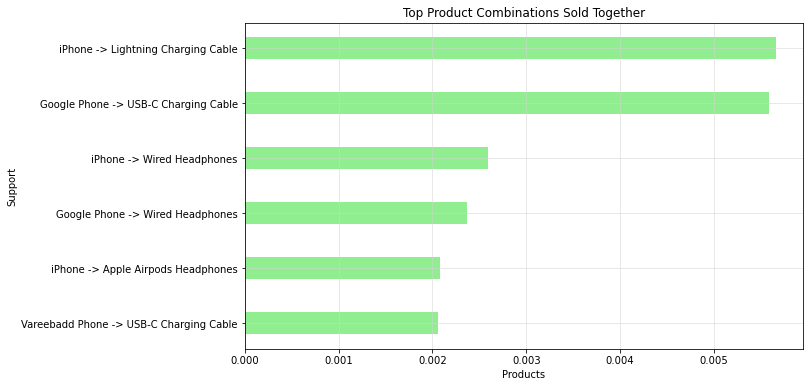

In [495]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(asso_rules_grouped['products'], asso_rules_grouped['support'], color='lightgreen', height= 0.4)
plt.title('Top Product Combinations Sold Together')
plt.xlabel('Products')
plt.ylabel('Support')
plt.grid(True, linestyle='-', linewidth=0.5, color='lightgray', zorder=1)
plt.show()

Based on these results, we can see some association rules and their support which means frequency of the products in the data set. The more support the products have between each other the more frequently they are bought together.

**I also want to see the frequency of each pair of products by numbers to illustrate another aspect of the analysis.**

In [496]:
# Group by 'Order ID' and concatenate 'Product' values
products_per_ord = df_sales.groupby('Order ID')['Product'].apply(','.join).reset_index()

# Rename columns for clarity
products_per_ord.columns = ['Order_ID', 'Products']

# Display the resulting DataFrame
products_per_ord

,Order_ID,Products
0,141234,iPhone
1,141235,Lightning Charging Cable
2,141236,Wired Headphones
3,141237,27in FHD Monitor
4,141238,Wired Headphones
...,...,...
178401,319666,Lightning Charging Cable
178402,319667,AA Batteries (4-pack)
178403,319668,Vareebadd Phone
178404,319669,Wired Headphones


In [497]:
### Creating a dataset of only pairs
comma_only_products = products_per_ord[products_per_ord['Products'].str.contains(',')]
comma_only_products.head()

,Order_ID,Products
41,141275,"USB-C Charging Cable,Wired Headphones"
56,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
131,141365,"Vareebadd Phone,Wired Headphones"
150,141384,"Google Phone,USB-C Charging Cable"
216,141450,"Google Phone,Bose SoundSport Headphones"


Importing relevant libraries in order to count the combination grouped products

In [498]:
from itertools import combinations
''' This function is used to create all possible combinations of a given length from a list of items. 
For example, if you have a list of products in an order, this function can create all pairs 
(or triplets, etc.) of products that are bought together.'''

from collections import Counter
'''This is a subclass of the dictionary used to count hashable objects. It's ideal for counting occurrences 
of elements in an iterable.'''

count = Counter()

pairs = comma_only_products['Products']

# Update the Counter with the generated pairs
count.update(pairs)

# Convert Counter items to a list of dictionaries
pairs_freq_list = [{'Pair': pair, 'Frequency': freq} for pair, freq in count.items()]

# Create a DataFrame from the list of dictionaries
pairs_freq_df = pd.DataFrame(pairs_freq_list)

pairs_freq_df = pairs_freq_df.sort_values('Frequency', ascending = False).head(6)
pairs_freq_df = pairs_freq_df.sort_values('Frequency', ascending = True)
pairs_freq_df

,Pair,Frequency
5,"iPhone,Apple Airpods Headphones",285
17,"Google Phone,Wired Headphones",303
24,"Vareebadd Phone,USB-C Charging Cable",312
12,"iPhone,Wired Headphones",361
3,"Google Phone,USB-C Charging Cable",856
10,"iPhone,Lightning Charging Cable",881


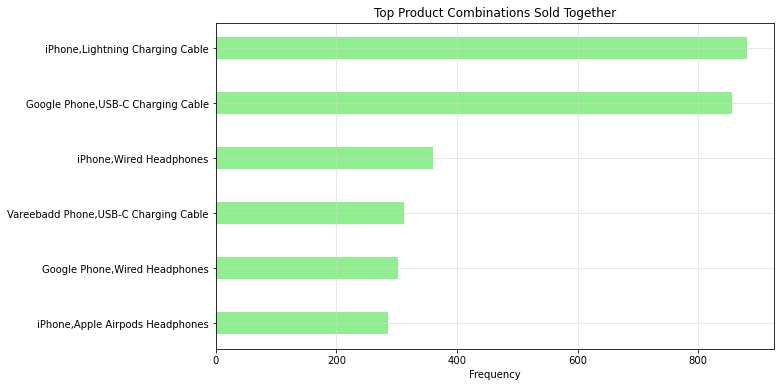

In [499]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(pairs_freq_df['Pair'], pairs_freq_df['Frequency'], color='lightgreen', height= 0.4)
plt.title('Top Product Combinations Sold Together')
plt.xlabel('Frequency')
plt.grid(True, linestyle='-', linewidth=0.5, color='lightgray', zorder=1)
plt.show()

Let's compare the support from the our last association rules

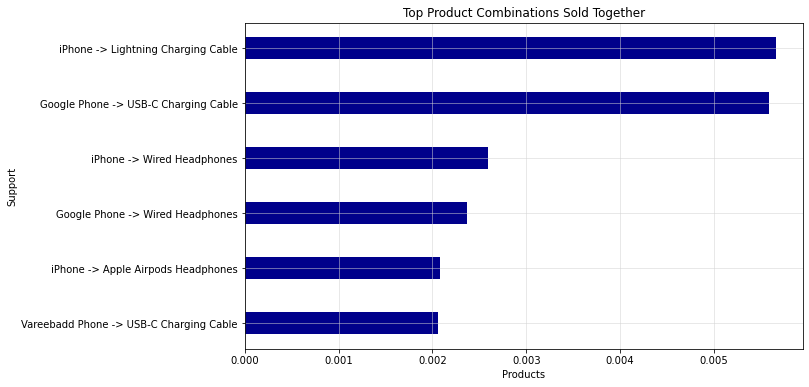

In [500]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(asso_rules_grouped['products'], asso_rules_grouped['support'], color='darkblue', height= 0.4)
plt.title('Top Product Combinations Sold Together')
plt.xlabel('Products')
plt.ylabel('Support')
plt.grid(True, linestyle='-', linewidth=0.5, color='lightgray', zorder=1)
plt.show()

In conclusion, for some people, it would be easier to understand the frequency by a number and not a support of association rules and algorithms. These charts answer both situations for both kinds.

#### The most sold product

In [501]:
top_products = df_sales.groupby(['Product']).sum()['Quantity Ordered']
top_products = top_products.reset_index()
top_products = top_products.sort_values(by = 'Quantity Ordered', ascending=False).head()
top_products

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31012
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23971
12,Lightning Charging Cable,23211
17,Wired Headphones,20553


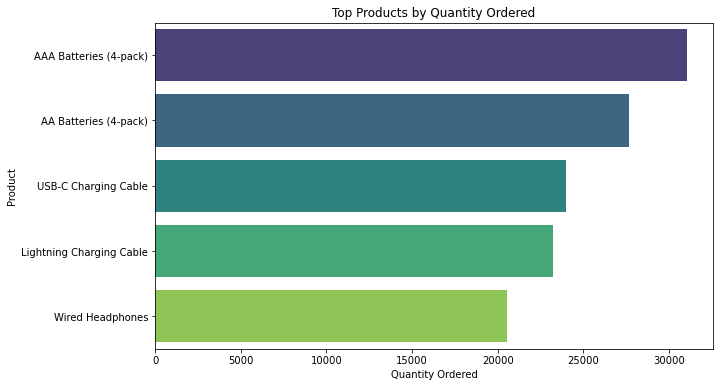

In [502]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity Ordered', y='Product', data=top_products, palette='viridis')
plt.title('Top Products by Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.show()

In [503]:
price_list = df_sales.groupby('Product').min()['Price Each'].reset_index().sort_values('Price Each', ascending=True)
price_list.head()

,Product,Price Each
5,AAA Batteries (4-pack),2.99
4,AA Batteries (4-pack),3.84
15,USB-C Charging Cable,11.95
17,Wired Headphones,11.99
12,Lightning Charging Cable,14.95


AAA Batteries (4-pack) are the top-selling and most affordable product on the price list.